## Before you begin
You will need to install scikit-image, and restart jupyter notebook. Use the following commands:
```
# install sci-kit image
pip3 install scikit-image

# shut down the currently running Jupyter notebook server
# you can also just hit Ctrl-C in the terminal where you typed "jupyter notebook" to start the server
kill -9 $(ps aux | grep jupyter | grep Library | awk '{print $2}')

# restart the server
jupyter notebook
```

In [1]:
!which python3
#!pip3 install scikit-image

/Library/Frameworks/Python.framework/Versions/3.8/bin/python3


In [2]:
import copy

In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

First, let's define a function that lets you load images from disk. Note that these images must be in the same directory as this Jupyter notebook file.

In [4]:
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)

    # Convert the image to be in the range (0, 1)
    out = out.astype(np.float64) / 255
    return out

Next, we'll load two sample images and test that we can display them.

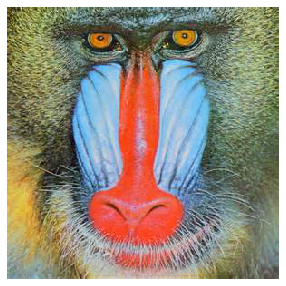

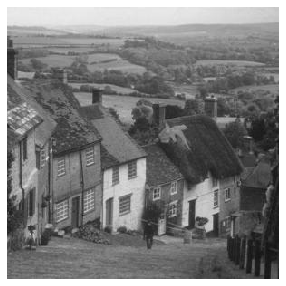

In [10]:
# You can change these paths to point to your own images if you want to try them out for fun.
# If you do, you must include these image files in your submission.
image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Exercise 1: dimming

Recall from lecture that the value of each pixel represents its brightness. Implement a function that takes in an image and returns the same image, but half as bright as the original image.

In [16]:
print(image2)

[[[0.89803922 0.89803922 0.89803922]
  [0.89803922 0.89803922 0.89803922]
  [0.89803922 0.89803922 0.89803922]
  ...
  [0.78823529 0.78823529 0.78823529]
  [0.78823529 0.78823529 0.78823529]
  [0.78431373 0.78431373 0.78431373]]

 [[0.90196078 0.90196078 0.90196078]
  [0.90196078 0.90196078 0.90196078]
  [0.90588235 0.90588235 0.90588235]
  ...
  [0.78039216 0.78039216 0.78039216]
  [0.78039216 0.78039216 0.78039216]
  [0.78039216 0.78039216 0.78039216]]

 [[0.90588235 0.90588235 0.90588235]
  [0.90588235 0.90588235 0.90588235]
  [0.90980392 0.90980392 0.90980392]
  ...
  [0.77647059 0.77647059 0.77647059]
  [0.77647059 0.77647059 0.77647059]
  [0.77647059 0.77647059 0.77647059]]

 ...

 [[0.41568627 0.41568627 0.41568627]
  [0.41568627 0.41568627 0.41568627]
  [0.41960784 0.41960784 0.41960784]
  ...
  [0.35686275 0.35686275 0.35686275]
  [0.28627451 0.28627451 0.28627451]
  [0.1254902  0.1254902  0.1254902 ]]

 [[0.43529412 0.43529412 0.43529412]
  [0.42745098 0.42745098 0.42745098]


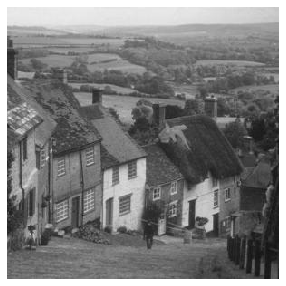

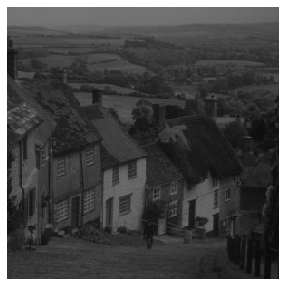

In [17]:
def dim_image(img):
    '''img is an image, represented as a 2D numpy array.'''
    out = copy.copy(img)
    for row in range(len(out)):
        for col in range(len(out[row])):
            out[row][col] /= 2
    return out
    
dim_image2 = dim_image(image2)
display (image2)
display (dim_image2)

In [18]:
print(image2[0][0], dim_image2[0][0])

[0.89803922 0.89803922 0.89803922] [0.44901961 0.44901961 0.44901961]


## Exercise 2: convert to gray scale

Implement a function that takes in an RGB color image and outputs that same image in grayscale.

Hint: You may want to look at the documentation for skimage.color to see if there is something useful there.

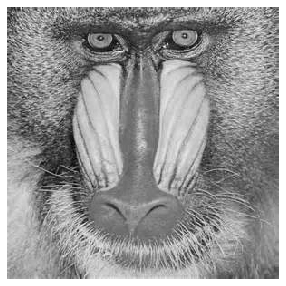

In [19]:
from skimage import color

def convert_to_grayscale(img):
    '''img is an RGB image, represented as a 2D numpy array.'''
    return color.rgb2gray(img)
    
grey_image = convert_to_grayscale(image1)
display(grey_image)

## Exercise 3: RGB exclusion

In the video we watched, we saw that you can represent a color image with a 2-dimensional array of pixels, where the R, G, and B pixels are grouped next to each other, and that this is how LCD screens are implemented.

In numpy, the representation is slightly different -- instead of having one 2-dimensional array, we have 3, and each one represents the brightness of the R, G, and B channels.

Implement a function that takes in an image and a channel, and returns an image without the specified channel.

Below is the image without the red channel.


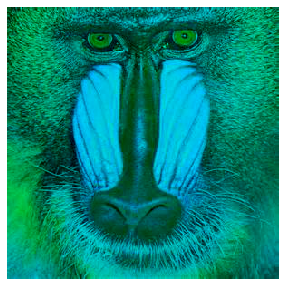

Below is the image without the green channel.


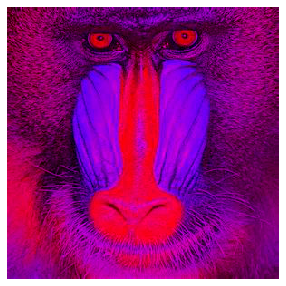

Below is the image without the blue channel.


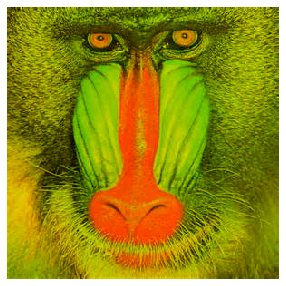

In [21]:
def rgb_exclusion(image, channel):
    """Return image **excluding** the rgb channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "R", "G" or "B".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    out = copy.copy(image)
    if channel == "R":
        out[:,:,0] = 0
    elif channel == "G":
        out[:,:,1] = 0
    else:
        out[:,:,2] = 0
    return out

without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Below is the image without the red channel.")
display(without_red)

print("Below is the image without the green channel.")
display(without_green)

print("Below is the image without the blue channel.")
display(without_blue)

## Advanced exercise #1: LAB color space

RGB is not the only way that we can represent colors. In this advanced exercise, we'll explore the LAB and HSV color spaces.

Implement a function that takes in an image and an LAB channel, and returns an image without the specified channel. Again, you may want to look at the skimage.color module to see if there's something in there that can help you.

Below is the image without the L channel.


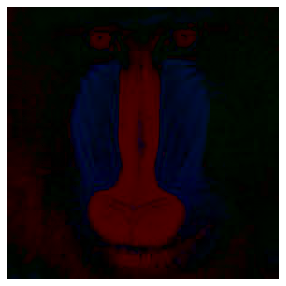

Below is the image without the A channel.


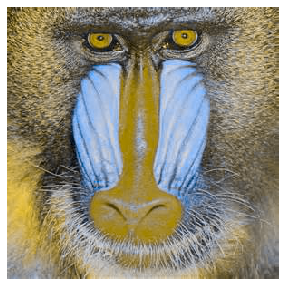

Below is the image without the B channel.


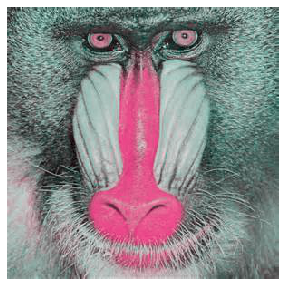

Below is the image of just the B channel.


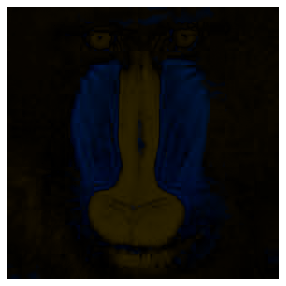

In [25]:
def lab_decomposition(image, channel):
    """Return image **excluding** the lab channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "L", "A" or "B".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    out = copy.copy(color.rgb2lab(image))
    if channel == "L":
        out[:,:,0] = 0
    elif channel == "A":
        out[:,:,1] = 0
    else:
        out[:,:,2] = 0
    return color.lab2rgb(out)

image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')


print("Below is the image without the L channel.")
display(image_l)

print("Below is the image without the A channel.")
display(image_a)

print("Below is the image without the B channel.")
display(image_b)

print("Below is the image of just the B channel.")
display(lab_decomposition(image_l, 'A'))

## Advanced exercise 1a

Explain what the L, A and B channels are and what happens when you take away the L and A channels.


The L channel is the perceptual lightness of the pixel, and the A and B channels are the color values of the pixel along a color space of the 4 colors unique to human vision: blue, red, green, and yellow. (https://en.wikipedia.org/wiki/CIELAB_color_space)

When you take away the L and A channels you are left with just the B channel, which is the value of the pixel along the blue-yellow spectrum. This means that the resulting image will only contain the information of how yellow vs blue each pixel is, and the image will appear yellow and blue. Although in the original image, the hair on the cheeks appear yellow, that is mostly due to the high luminance of the hairs, a high yellow value isn't needed to appear yellow and the yellow value is quite low. On the other hand, the nose doesn't seem very yellow, but because it's quite dark, the amount of yellow needs to be high to bring out that strong orange color.

## Advanced exercise 2: HSV exploration

Explain what the H, S and V channels are and what happens when you take away the both the H and S channels.

It may help you to implement a function that performs HSV decomposition and removes these channels; this is optional.

Below is the image without the H channel.


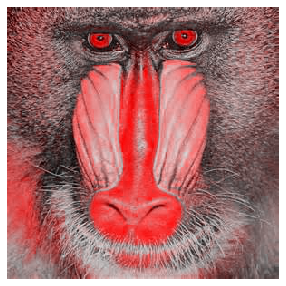

Below is the image without the S channel.


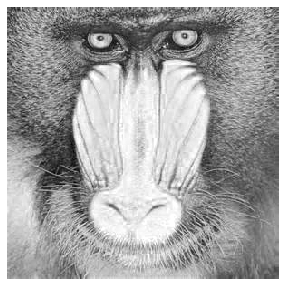

Below is the image without the V channel.


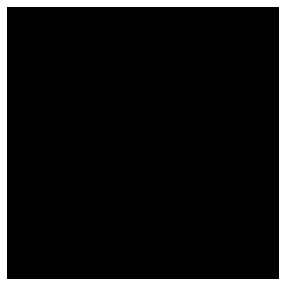

In [26]:
def hsv_decomposition(image, channel):
    """Return image **excluding** the hsv channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "H", "S" or "V".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    out = copy.copy(color.rgb2hsv(image))
    if channel == "H":
        out[:,:,0] = 0
    elif channel == "S":
        out[:,:,1] = 0
    else:
        out[:,:,2] = 0
    return color.hsv2rgb(out)

image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')


print("Below is the image without the H channel.")
display(image_h)

print("Below is the image without the S channel.")
display(image_s)

print("Below is the image without the V channel.")
display(image_v)

H is the hue of the pixel, meaning which color it is. Hue ranges from red at 0, to green at 0.33, to blue at 0.67, back to red at 1. S is saturation, meaning how much of that color from the hue is present. If saturation is 0, you will have a grayscale image. Lastly, V is value, which is the grayscale value of the pixel, i.e. how bright or dark the pixel is. If value is 0, your image will be black.

## Advanced exercise 3: combining images

Implement the following method, which takes in two images and returns a new image where the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Exclude the specified channel for the given image. 

You should see the left half of the monkey without the red channel and the right half of the house image with no green channel.

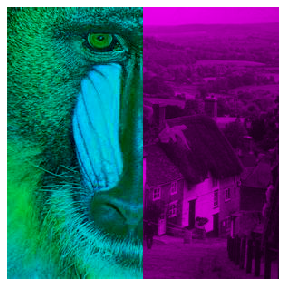

In [38]:
def mix_images(image1, image2, channel1, channel2):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        image2: numpy array of shape(image_height, image_width, 3).
        channel1: str specifying channel used for image1.
        channel2: str specifying channel used for image2.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    if image1.shape != image2.shape:
        raise Exception("Images have different shapes")
    
    out = copy.copy(image1)
    if channel1 == "R":
        out[:,:,0] = 0
    elif channel1 == "G":
        out[:,:,1] = 0
    else:
        out[:,:,2] = 0
        
    out2 = copy.copy(image2)
    if channel2 == "R":
        out2[:,:,0] = 0
    elif channel2 == "G":
        out2[:,:,1] = 0
    else:
        out2[:,:,2] = 0
    
    width = len(out[0])//2
    for row in range(len(out)):
        out[row, width:, :] = out2[row, width:, :]
        
    return out

image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)


## Advanced exercise 4: exploration

Implement a function that takes a single image, and performs a different operation to each of the 4 quadrants of the image, returning an image that merges the 4 quadrants back together.

For example, you might remove a channel or two from one quadrant, dim or brighten another quadrant, etc.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


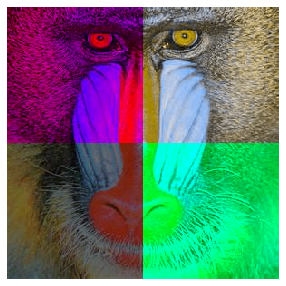

In [41]:
def mix_image_quad(image):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        image2: numpy array of shape(image_height, image_width, 3).
        channel1: str specifying channel used for image1.
        channel2: str specifying channel used for image2.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    # Remove G value
    out = copy.copy(image)
    out[:,:,1] = 0
        
    # Remove A value
    out2 = copy.copy(color.rgb2lab(image))
    out2[:,:,1] = 0
    out2 = color.lab2rgb(out2)
        
    # Dim by half
    out3 = copy.copy(image)
    out3[:,:,:] = out3[:,:,:]/2
    
    # Remove Cr value
    out4 = copy.copy(color.rgb2ycbcr(image))
    out4[:,:,2] = 0
    out4 = color.ycbcr2rgb(out4)
    
    height = len(out)//2
    width = len(out[0])//2
    for row in range(len(out)):
        if row < height:
            out[row, width:, :] = out2[row, width:, :]
        else:
            out[row, :width, :] = out3[row, :width, :]
            out[row, width:, :] = out4[row, width:, :]
            
    return out

image_mixed = mix_image_quad(image1)
display(image_mixed)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


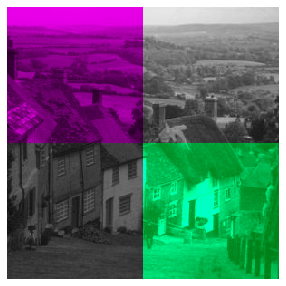

In [42]:
image_mixed = mix_image_quad(image2)
display(image_mixed)

## Real World Applications

The LAB color space is used in Photoshop because it makes adjusting the percieved brightness easy. This image is dark, however, it is hard to make it brighter in the RGB colorspace without saturating it.

In [5]:
def display_large(img, title=None):
    # Show image
    plt.figure(figsize = (20,20))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
image_path = './photo_2021-09-14_11-32-06.jpg'

image3 = load(image_path)

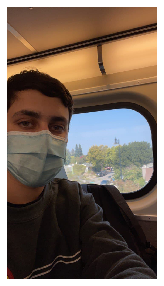

In [11]:
display(image3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


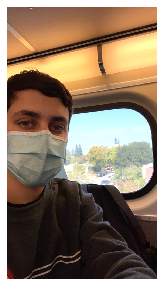

In [19]:
display(image3*1.3)  # Multiplying all the RGB values

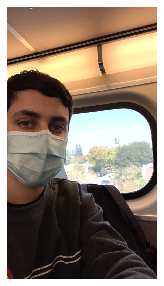

In [20]:
image3lab = color.rgb2lab(image3)
image3lab[:,:,0] = image3lab[:,:,0] * 1.3  # Adjusting the L value
display(color.lab2rgb(image3lab))

Although the difference is subtle, the straight RGB brightening distorts the colors: my face is redder and the lights are yellower than they are in the original image. Extracting the luminance and brightening only it leaves the other colors the same, and results in a more natural looking image. That is why Photoshop uses LAB to change image brightness.

RGB also doesn't offer an easy way to do other color corrections. One of the most common color corrections is around color temperature. Different light sources have different "temperatures," ranging from the "warm" orange candlelight glow, to yellow incandesent lights, to light yellow sunlight, to the "coolest" blue leds. If you are in a warm light, the whole image will appear warmer i.e. more yellow, and vice versa for colder blue lights. If you want an accurate representation of how the objects in the image would look under a different lighting, you need to correct the color temperature. Because of the warm-cool spectrum of lighting, most color temperature adjusting is based on increasing/decreasing the yellow/blue value of the pixels. Because LAB extracts the yellow-blue spectrum as the B value, it is really easy to adjust the temperature with it. Below, I reduce the B value to make the image bluer. It ends up looking like I'm in a room with flourescent lighting because of the cooler lighting. If you scroll back up, you'll notice how yellow the lights in Caltrain actually are. Doing this color correction accounts for that yellow lighting and shows a view of how I would look under another source of light. 

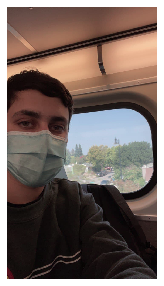

In [36]:
image3lab = color.rgb2lab(image3)
image3lab[:,:,2] = image3lab[:,:,2] * 0.6
display(color.lab2rgb(image3lab))

Color temperature not only shows how objects would look under different lighting, but affects the meaning of the image too. Warmer lighting can create a more vibrant mood than cool lighting which is often associated with seriousness, sterility, and/or sadness. Cinamatographers and photographers often use this to their advantage and design sets with certain types of lighting to direct the audience's emotional reactions to the scenes.

https://en.wikipedia.org/wiki/Color_temperature